In [1]:
import astropy.io.fits as pf
import pylab as mplot
%pylab inline
import healpy as hp
from astropy import units as u
from astropy.coordinates import SkyCoord
from pylab import cm
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
from scipy import stats
from scipy import signal

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

Populating the interactive namespace from numpy and matplotlib


### Cluster 3

In [ ]:
#     np.savez('Planck_cluster_bootstrap_scaled_'+str(label)+'_'+str(i)+'.npz', ra=RA_sel[i], dec=DEC_sel[i], 
#              lon=LON_sel[i], lat=LAT_sel[i], z=Z_sel[i], mass=MASS_sel[i], snr=SNR_sel[i], R500c=R500c, 
#              R_over_R500c=DD, median_y=Y1_mean, mean_y=Y2_mean, bg=bg, cov_median=cov_boot1, cov_mean=cov_boot2, 
#              SG=SG, Rcross=Rcross, midR=midR, logder=logder, logder_err=np.std(SG_err, axis=0))

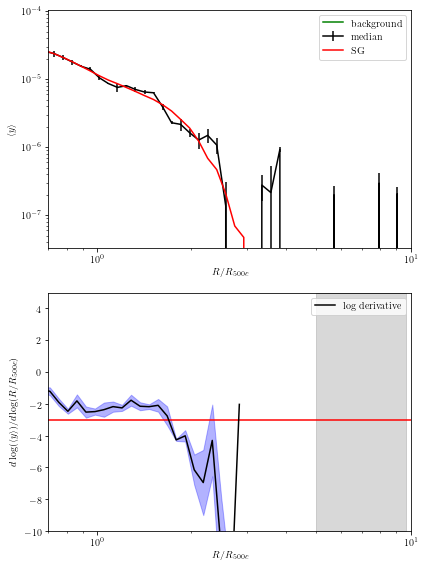

In [14]:
# name = 'Planck_cluster_bootstrap_scaled_milca_2.npz'
name = 'SPT_cluster_bootstrap_scaled_7.npz'
infile = np.load(name)

DD = infile['R_over_R500c']
Y1_mean = infile['median_y']
Y1_err = np.diag(infile['cov_median'])**0.5
SG = infile['SG']
bg = infile['bg']
midR = infile['midR']
logder = infile['logder']
logder_err = infile['logder_err']
Rcross=infile['Rcross']

mplot.figure(figsize=(6,8))
mplot.subplot(211)

mplot.errorbar(DD, Y1_mean, yerr=Y1_err, color='k', label='median')
mplot.errorbar(DD, SG, label='SG', color='r')
mplot.plot(DD, SG*0 + bg, label='background', color='g')
mplot.xlabel('$R/R_{500c}$')
mplot.ylabel('$\langle y \\rangle$')

mplot.yscale('log')
mplot.xscale('log')
mplot.xlim(0.7,10)
mplot.legend()

mplot.subplot(212)
mplot.errorbar(midR, logder, label='log derivative', color='k')

mplot.fill_between(midR, logder-logder_err, logder+logder_err, alpha=0.3, color='b')
mplot.fill_between(DD[DD>Rcross], DD[DD>Rcross]*0.0-10, DD[DD>Rcross]*0.0+5, color='grey', alpha=0.3)
mplot.plot([0.7,10],[-3,-3], color='r')
mplot.xscale('log')
mplot.xlabel('$R/R_{500c}$')
mplot.ylabel('$d \log(\langle y \\rangle)/d \log (R/R_{500c})$')

mplot.xlim(0.7,10)
mplot.ylim(-10,5)
mplot.legend()
mplot.tight_layout()
mplot.savefig(name[:-4]+'.png')

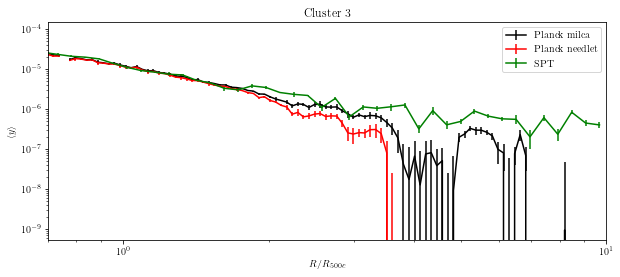

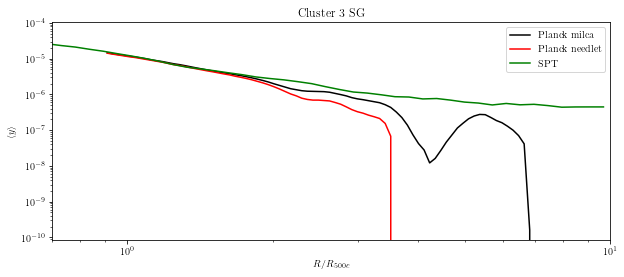

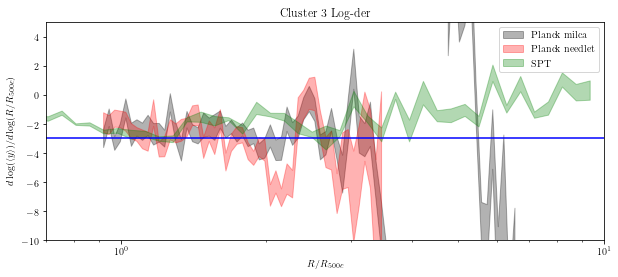

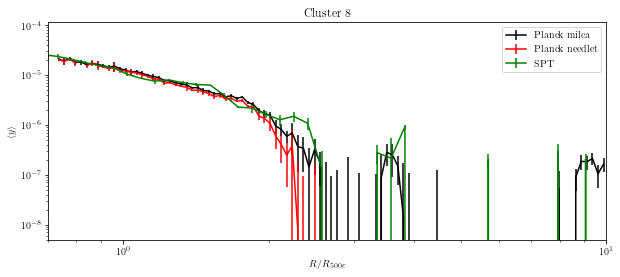

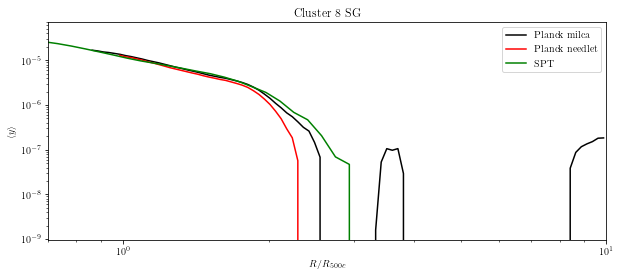

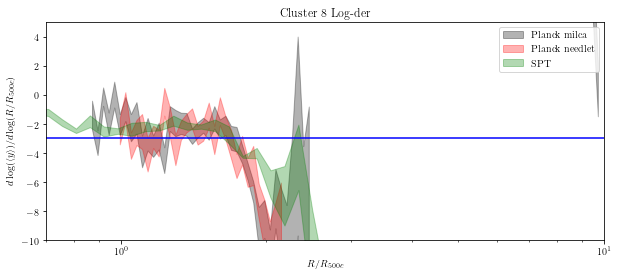

In [36]:
for i in [2,7]:
    Y1 = np.load('Planck_cluster_bootstrap_scaled_milca_'+str(i)+'.npz')
    Y2 = np.load('Planck_cluster_bootstrap_scaled_needlet_'+str(i)+'.npz')
    Y3 = np.load('SPT_cluster_bootstrap_scaled_'+str(i)+'.npz')

    mplot.figure(figsize=(10,4))
    mplot.errorbar(Y1['R_over_R500c'], Y1['median_y'], yerr=np.diag(Y1['cov_median'])**0.5, label='Planck milca', color='k')
    mplot.errorbar(Y2['R_over_R500c'], Y2['median_y'], yerr=np.diag(Y2['cov_median'])**0.5, label='Planck needlet', color='r')
    mplot.errorbar(Y3['R_over_R500c'], Y3['median_y'], yerr=np.diag(Y3['cov_median'])**0.5, label='SPT', color='g')

    mplot.title('Cluster '+str(i+1))
    mplot.yscale('log')
    mplot.xscale('log')
    mplot.xlim(0.7,10)
    mplot.xlabel('$R/R_{500c}$')
    mplot.ylabel('$\langle y \\rangle$')
    mplot.legend()
    
    mplot.figure(figsize=(10,4))
    mplot.plot(Y1['R_over_R500c'], Y1['SG'], label='Planck milca', color='k')
    mplot.plot(Y2['R_over_R500c'], Y2['SG'], label='Planck needlet', color='r')
    mplot.plot(Y3['R_over_R500c'], Y3['SG'], label='SPT', color='g')

    mplot.title('Cluster '+str(i+1)+' SG')
    mplot.yscale('log')
    mplot.xscale('log')
    mplot.xlim(0.7,10)
    mplot.xlabel('$R/R_{500c}$')
    mplot.ylabel('$\langle y \\rangle$')
    mplot.legend()
    
    
    mplot.figure(figsize=(10,4))
#     mplot.plot(Y1['midR'], Y1['logder'], label='Planck milca', color='k')
#     mplot.plot(Y2['midR'], Y2['logder'], label='Planck needlet', color='r')
#     mplot.plot(Y3['midR'], Y3['logder'], label='SPT', color='g')


    mplot.fill_between(Y1['midR'], Y1['logder']-Y1['logder_err'],  Y1['logder']+Y1['logder_err'], label='Planck milca', alpha=0.3, color='k')
    mplot.fill_between(Y2['midR'], Y2['logder']-Y2['logder_err'],  Y2['logder']+Y2['logder_err'], label='Planck needlet', alpha=0.3, color='r')
    mplot.fill_between(Y3['midR'], Y3['logder']-Y3['logder_err'],  Y3['logder']+Y3['logder_err'], label='SPT', alpha=0.3, color='g')
    mplot.title('Cluster '+str(i+1)+' Log-der')

    #     mplot.fill_between(DD[DD>Rcross], DD[DD>Rcross]*0.0-10, DD[DD>Rcross]*0.0+5, color='grey', alpha=0.3)
    mplot.plot([0.7,10],[-3,-3], color='b')
    mplot.xscale('log')
    mplot.xlabel('$R/R_{500c}$')
    mplot.ylabel('$d \log(\langle y \\rangle)/d \log (R/R_{500c})$')

    mplot.xlim(0.7,10)
    mplot.ylim(-10,5)
    mplot.legend()
